# Data Science Crash Course

Topics:
* describing your data
    * plotting review
        * scatter
        * histogram
        * time series
    * distributions at a glance
        * normal distribution
        * poisson
        * exponential
        * gamma
        * beta
    * describing distributions with statistics
        * central tendency
        * spread
    * a very brief introduction to matrices
    * hypothesis based testing
        * is your sample from a distribution?
        * are your samples from the same distribution?
* modeling your data
    * definitions
        * what is a statistical model
        * features
        * labels
    * machine learning problem set up
        * regression
        * classification
        * manifold learning
    * simulating your data, from a known distribution
        * mle to bootstrap
    * linear regression
    * changing the link function, to use other distributions
    * logistic regression 
    * ordinal regression
    * tree based models
    * ensemble models
        * random forests - bagging
        * gradient boosted trees - boosting
    * support vector machines
    * neural networks
* Practical Concerns
    * bias variance tradeoff
    * overfitting your data
    * classification thresholds
    * how to handle imbalanced data
    * interpreting models
    * building confidence in your model - honest-ml
* Going to production
    * data drift
    * orchestration and through put
    * model monitoring
    * hyperparameter tuning
    * working with big data

# The Goal Of Data Science

The goal of data science is to be able to effectively communicate and understand what is happening in your data.  Being able to tell a visual story is imperative as most people cannot speak the language of statistics.

In [9]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.normal(0, 10, size=10000).reshape(1000, 10))
df["A"] = df[0] + df[1]
df["B"] = df[2] + df[3]
df["timestamp"] = df.index

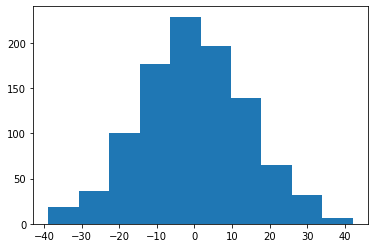

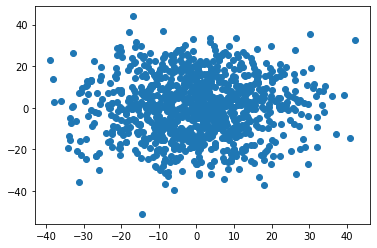

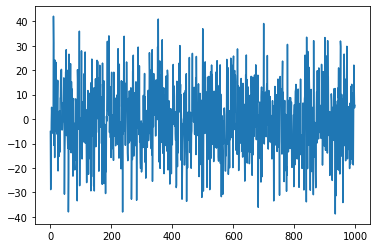

In [10]:
import matplotlib.pyplot as plt

plt.hist(df["A"])
plt.show()
plt.scatter(df["A"], df["B"])
plt.show()
plt.plot(df["timestamp"], df["A"])
plt.show()

As the above three visuals show us, this is the standard visualization motif employed by data scientists throughout.  We will be using these visual tools to help build a visual vocabular for effective scientific communication.

# Distributions

It should be assumed that most data has variation.  The question that a distribution answers is - does that variation follow a standard pattern and if so, can we quantify it?

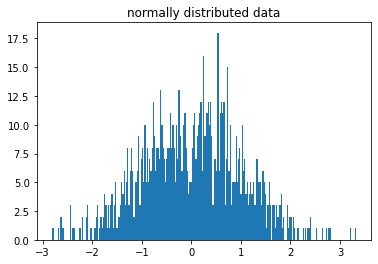

In [12]:
import numpy as np
import matplotlib.pyplot

plt.hist(np.random.normal(0, 1, size=1000), bins=250)
plt.title("normally distributed data")
plt.show()

As you can see, normally distributed data follows the simplest possible randomness pattern - data 'collects' around the sample and spreads out via some spread around the central tendency.  We can think of the normal distribution as having some sort of variation about the center of the data.  Like waves emminating from a single point in probabilistic space.

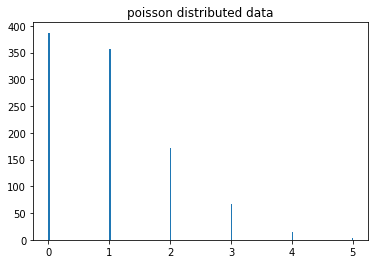

In [14]:
import matplotlib.pyplot
from scipy import stats

mu = 1
plt.hist(stats.poisson.rvs(mu, size=1000), bins=250)
plt.title("poisson distributed data")
plt.show()

Poisson random data typically is thought of as coming from a discrete time series.  Here we can see, the mean is around 1, and most of the samples are between 0 and 2, with an exponential decay towards 6.  One way to think about this data is in terms of arrival times - 

Suppose that on average, people arrive at a station after 1 hour of leaving some other station, what is the likely distribution of entrances for a given day, say over a 12 hour period?  

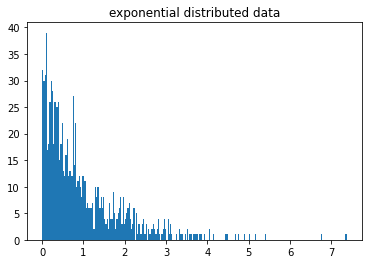

In [16]:
import numpy as np
import matplotlib.pyplot

plt.hist(np.random.exponential(scale=1, size=1000), bins=250)
plt.title("exponential distributed data")
plt.show()

The exponential distribution can be thought of as a more 'continuous' version of the poisson, as you can see here.  The data is more randomly distributed, instead of only occurring at the integers - we can see a range of real number valued data points.  But essentially, it answers the same question as a poisson, just on a different scale.  So suppose we cared about how people arrive to the second?  Then the exponential distribution is appropriate.

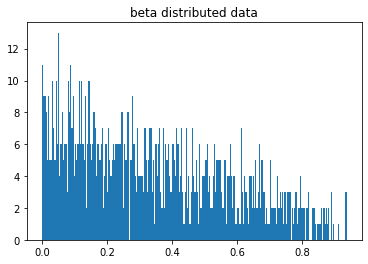

In [18]:
import numpy as np
import matplotlib.pyplot

plt.hist(np.random.beta(1,2, size=1000), bins=250)
plt.title("beta distributed data")
plt.show()

The beta distribution is sort of somewhere between the exponential and the normal distribution.  It's the most 'flexible' data model and take on a wide array of shapes:

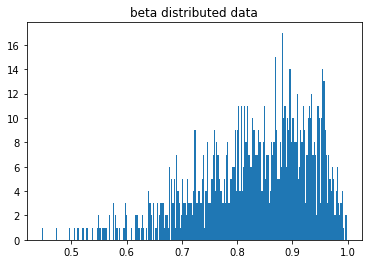

In [19]:
import numpy as np
import matplotlib.pyplot

plt.hist(np.random.beta(10,2, size=1000), bins=250)
plt.title("beta distributed data")
plt.show()

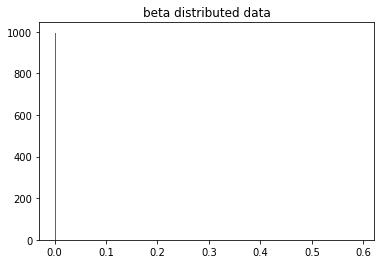

In [20]:
import numpy as np
import matplotlib.pyplot

plt.hist(np.random.beta(0.001,2, size=1000), bins=250)
plt.title("beta distributed data")
plt.show()

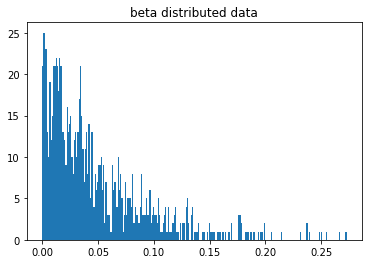

In [21]:
import numpy as np
import matplotlib.pyplot

plt.hist(np.random.beta(1,20, size=1000), bins=250)
plt.title("beta distributed data")
plt.show()

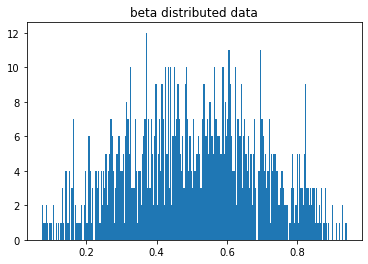

In [25]:
import numpy as np
import matplotlib.pyplot

plt.hist(np.random.beta(3,3, size=1000), bins=250)
plt.title("beta distributed data")
plt.show()

It should be noted that poisson, exponential and beta distributions can be useful in modeling sensored data.  So if we were interested in looking at survival analysis, these distributions would be very useful.  Sadly, survival analysis is out of scope for this lecture.

# Descriptive Statistics

If a distribution is simple attempt and modeling the variation within a data set to a 'kind' of randomness, a descriptive statistic attempts to suppress the variation of different samples in order to provide descriptive summary of the data.  Thus we can reduce our phenomonon of study down to an expectation, rather than having to consider the full sample at all times.  This gives us another type of language - a language of summary for easier discussion and communication to stakeholders and lay people. 

In [26]:
import numpy as np

arr = np.random.normal(0, 1, size=1000)
print("central tendency", arr.mean())
print("spread", arr.std())

central tendency 0.004061878418006469
spread 1.0372906365470138


In [31]:
import numpy as np
from scipy.stats import expon

arr = np.random.exponential(scale=1, size=1000)
center, spread = expon.fit(arr)
print("central tendency", center)
print("spread", spread)

central tendency 0.0018163066249501992
spread 1.0277986523645897


In [32]:
import numpy as np
from scipy.stats import beta

arr = np.random.beta(10,2, size=1000)
a, b, loc, scale = beta.fit(arr)
print("central tendency", loc)
print("spread", scale)
print("a", a)
print("b", b)

central tendency 0.1381028845101291
spread 0.8610763691171394
a 8.357601050811526
b 1.9173712452410099


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


# Hypothesis Based Testing

Unlike mathematics or algorithms, statistics works from a place of variation as a natural consequence of the data generating process.  Thus, we must test our descriptive statistics and our distributions to ensure they are in fact modeled as we believe them to be.  We gain confidence about the descriptions we create and the distributions we assume our samples come from through hypothesis based testing, which is more or less a fancy way of saying, guess and check.

The main work horse of this method is the pvalue.  In order to get a pvalue, you choose a threshold and then calculate the probabilities beyond that threshold and sum all the probabilities together.  This implies pvalues are actually a much stronger indication that a thing is true or not true than a simple probability, which in the discrete case, only checks a single event.

In general, we use hypothesis tests to answer two questions:

1. Is a given sample like another sample or distribution?
2. Is a given description like another description?

We will focus on tests answering question 1 for the purposes of this lecture.

In [33]:
import numpy as np
from scipy import stats

# null hypothesis: the two samples are drawn from the same distribution.
stats.ks_2samp(np.random.normal(0,1,size=1000), np.random.normal(0,1,size=100))

KstestResult(statistic=0.085, pvalue=0.5055028519339377)

In [34]:
stats.ks_2samp(np.random.normal(0,1,size=1000), np.random.normal(0,1,size=10000))

KstestResult(statistic=0.0353, pvalue=0.20336017551378638)

In [35]:
stats.ks_2samp(np.random.normal(0,10,size=1000), np.random.normal(0,1,size=10000))

KstestResult(statistic=0.3912, pvalue=0.0)

In [36]:
stats.cramervonmises_2samp(np.random.normal(0,10,size=1000), np.random.normal(0,1,size=10000))

CramerVonMisesResult(statistic=56.4334871181818, pvalue=1.3728342129759596e-08)

In [37]:
stats.cramervonmises_2samp(np.random.exponential(scale=1,size=1000), np.random.normal(0,1,size=1000))

CramerVonMisesResult(statistic=40.46458099999995, pvalue=1.2643153080027503e-08)

In [40]:
stats.cramervonmises_2samp(stats.beta.rvs(a=3,b=3,loc=0,scale=1,size=1000), np.random.normal(0,1,size=1000))

CramerVonMisesResult(statistic=43.706256999999994, pvalue=7.070265040098889e-09)

As the above shows.  By comparing the tests, we can discern which samples come from the same distribution.  And which ones vary in a different way.  For the last one, we will regress to a visual inspection as well to ensure the point is clear:

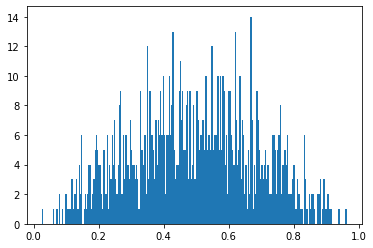

In [43]:
import matplotlib.pyplot as plt

arr = stats.beta.rvs(a=3,b=3,loc=0,scale=1,size=1000)
plt.hist(arr, bins=250)
plt.show()

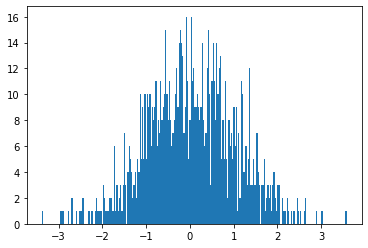

In [44]:
arr = np.random.normal(0,1,size=1000)
plt.hist(arr, bins=250)
plt.show()

Notice that the beta distribution is more spread out than the normal, hence the null hypothesis is rejected that the two samples are drawn from the same distribution.

# Modeling Your Data


Now that we have a visual and descriptive vocabulary for discussing data, let's add in some machine learning definitions which will be of value throughout the remainder of our lecture:

* model
* features
* labels

## Models

A statistical model is one built from data.  Technically we've already seen quiet a few 'models' in this lecture alone.  The distributions, the descriptive statistics - these are 'representations' of our data.  In other words, models of our data.  A model, generally speaking, is a reduction of some kind to an important aspect or condition of our subject of study.  In data science, our subject of study is data, thus our model, is a reduction or simplification of our data.  

When we looked at the central tendency or spread of a data set, what we were really doing is looking at a simplification of the data, a representation of the data.  These simplifications were trivial - they are small and don't account for nuanced interactions or allow us to assume some process of variation that can generate new variation.  Perhaps we care a great deal about the relationship between how one process generates data and the process by which another one generates data - this is the perview of statistical modeling.  And the intention behind building and interpreting such models - to build approximate mathematical formula, automatically, which capture some important aspect of reality, subject to randomness.  

## Features & Labels

If you've ever worked in the field of statistics or built a model then features are simply your inputs and labels are your outputs from some unknown data generating process.  For everyone else, the typical task in data modeling, be that statistics, machine learning or something else, is to assume that we care about one thing or more rarely a few things and we control a bunch of other 'stuff'.  Using statistical modeling, we can observe the process that governs this other stuff by looking at how the variance in the features, aka the variables we can control affect the labels, aka the features we cannot control.  This simple scheme generalizes to an immense amount of applications.  And in affect is an automation of the process of coming up with new mathematical formulas.  

## Bring it all together

Every statistical model is subject to some sort of functional form.  A set of assumptions and inductive biases.  And then our 'learning' process, the mathematical set of operations we take to guess and check our model, are how we 'fine-tune' our functional form to fit our data.  

So to summarize, modeling is done as follows:

1. We guess a generic functional form - this is similar to guessing a distribution
2. We use data so a computer can guess the fine-tuned functional form - this is similar to figuring out the descriptive statistics
3. we look at some new data and try to match the variation of the functional forms predicted labels to the labels seen in the dataset

# Regression

Up until this point we've talked very generically about the data modeling process.  Now let's look at a specific kind of modeling - regression analysis.  Assume that our features are continuous and drawn from a known distribution.  Additionally, assume that our labels are continuous and drawn from a known distribution.  The simplest possible case of this is linear regression, which assumes all data - labels and features are drawn from the normal distribution.

Let's look at an example:

In [45]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0


In [46]:
import statsmodels.api as sm
import pandas as pd

# data source: https://hbiostat.org/data/
# data dictionary: https://hbiostat.org/data/repo/Cdiabetes.html
# glyhb is Glycosolated Hemoglobin

diabetes = pd.read_csv("diabetes.csv")
diabetes = diabetes.dropna(subset=["hdl", "glyhb", "weight", "waist"])
measures = diabetes[["hdl", "glyhb", "weight", "waist"]]
ols = sm.OLS(diabetes["chol"].values, measures)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              2257.
Date:                Mon, 12 Dec 2022   Prob (F-statistic):                   3.17e-264
Time:                        15:39:49   Log-Likelihood:                         -1997.7
No. Observations:                 386   AIC:                                      4003.
Df Residuals:                     382   BIC:                                      4019.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hdl            1.0795      0.110      9.788      0.000       0.863       1.296
glyhb          6.2453      1.019      6.127      0.000       4.241       8.249
weight        -0.1856      0.102     -1.817      0.070      -0.386       0.015
waist          3.9590      0.575      6.883      0.000       2.828       5.090
==============================================================================
Omnibus:                       37.566   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.335
Skew:                           0.642   Prob(JB):                     2.15e-13
Kurtosis:                       4.406   Cond. No.                         92.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This statistical model is linear regression.  It assumes that our data is normally distributed, that's our general guess.  That is to say, our input features - 

* "hdl" - high density lipides concentration
* "glyhb" - Glycosolated Hemoglobin
* "weight" - weight in lbs
* "waist" - waist size in inches

are related to the current blood cholesterol levels in a diabetic person's body.

And more specifically, we can control or try to control these 4 variables.  And in doing so, we can lower cholesterol.
This statistical model, shows us how effective controling for each of these variables will be in making cholesterol go down or up.

So if we increase our waist size by 1 inch, then cholesterol goes up by 3.95-ish milligrams per decilitter of blood.

# Link functions

What happens if we are interested in using a different distribution, other than the normal distribution to model our data?  Well, let's start by checking to see if our data is truly normal:

In [49]:
from scipy import stats
import numpy as np

for col in measures.columns:
    tmp = measures[col].values
    center, spread = stats.norm.fit(tmp)
    normally_distributed = np.random.normal(center, spread, size=len(tmp))
    print(col, stats.cramervonmises_2samp(tmp, normally_distributed))

hdl CramerVonMisesResult(statistic=0.8248040215844696, pvalue=0.006375427030652414)
glyhb CramerVonMisesResult(statistic=3.6335388198340866, pvalue=3.0285222107906407e-09)
weight CramerVonMisesResult(statistic=0.7826887970146856, pvalue=0.008040168220012078)
waist CramerVonMisesResult(statistic=0.22359325082553028, pvalue=0.22635352104128348)


In some cases we definitely reject the null hypothesis, implying the data is certainly not normally distributed!  This implies that our targets and labels are still assumed to be continuous but that linear regression may not be the 'best fit' for our choice of model.  But can we still use something in that family?  

This is the question that generalized linear models or glms attempt to answer.  We'll be using the gamma distribution to attempt to model our data in this case because of it's flexability.  The gamma is an inverse beta distribution.

In [50]:
import statsmodels.api as sm

diabetes = pd.read_csv("diabetes.csv")
diabetes = diabetes.dropna(subset=["hdl", "glyhb", "weight", "waist"])
measures = diabetes[["hdl", "glyhb", "weight", "waist"]]

gamma = sm.families.Gamma()
starting_mu = gamma.starting_mu(y=diabetes["chol"])
model = sm.GLM(diabetes["chol"], measures, family=sm.families.Gamma())
result = model.fit(starting_mu=starting_mu)
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   chol   No. Observations:                  386
Model:                            GLM   Df Residuals:                      382
Model Family:                   Gamma   Df Model:                            3
Link Function:          inverse_power   Scale:                        0.071576
Method:                          IRLS   Log-Likelihood:                -2083.9
Date:                Mon, 12 Dec 2022   Deviance:                       26.424
Time:                        16:00:49   Pearson chi2:                     27.3
No. Iterations:                     6   Pseudo R-squ. (CS):            -0.4081
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
hdl         1.326e-05   3.31e-06      4.012      0.0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


## Goodness of Fit

Inorder to determine goodness of fit we look at the ratio of the Deviance to the degrees of freedom -

$$ \frac{26.424}{386} \approx 0.06 $$ 
The question we ask is a simple one, is the ratio greater than 1?

In our case it is not, which means our model probably fits okay.

## Tree Based models

Up until now we've assumed that our labels and features are both continuous.  What if we relax the assumption of having only continuous data?  How might we model our data set?  One solution is to use a decision tree, which splits the data into buckets and then uses those splits to build a mathematical model, which can predict labels from features.

In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

diabetes = pd.read_csv("diabetes.csv")
diabetes = diabetes.dropna(subset=["hdl", "glyhb", "weight", "waist", "chol"])
measures = diabetes[["hdl", "glyhb", "weight", "waist", "chol"]]
y = measures["chol"].values
measures = measures.drop("chol", axis=1)

for feature in ["hdl", "glyhb", "weight"]:
    measures[f"{feature}_highlow"] = 0
    indices = measures[measures[feature] > measures[feature].mean()].index
    measures.loc[indices, f"{feature}_highlow"] = 1
    measures = measures.drop(feature, axis=1)
    
X_train, X_test, y_train, y_test = train_test_split(measures, y)
dec_tree = DecisionTreeRegressor(max_depth=4)
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(y.mean())

34.89538452392146
207.68134715025906


In the above example, we simply classify anything above the mean of a variable as high and anything below the mean of a variable as low.  This makes it easier to bucket features.  And then we regression the decision tree.  If we are interested in the coefficients we'll look at feature importances - note, this allows us to 'linearly' capture each prediction.  However, a tree based model is strongly not linear.  And is distribution free.

In [74]:
for index, measure in enumerate(measures.columns):
    print(measure, dec_tree.feature_importances_[index])

waist 0.5962761832838673
hdl_highlow 0.282802938173836
glyhb_highlow 0.12092087854229663
weight_highlow 0.0


As we can see, waist is the most important feature, followed by hdl, then glyhb, then weight.  Generally speaking, the bigger the feature importance, the more the feature matters.  One thing we can do that we can't with linear regression is plot the decision tree:

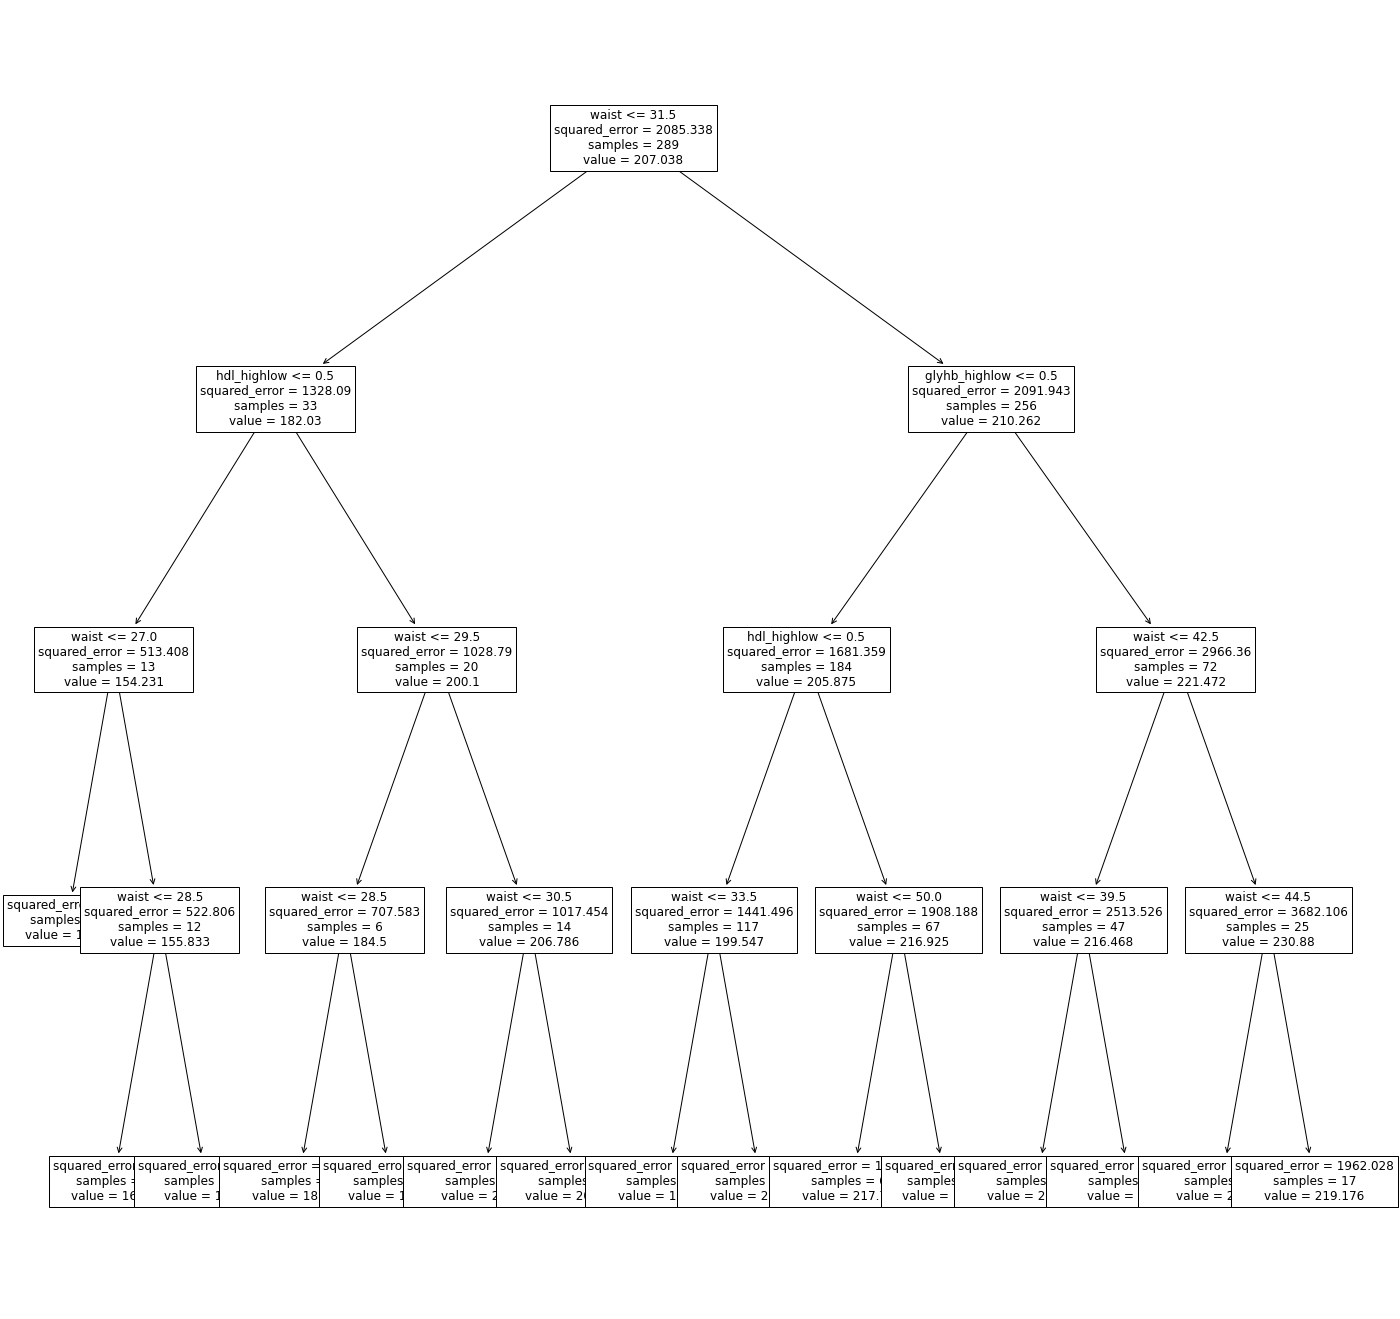

In [77]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(24,24)) 
tree.plot_tree(dec_tree, feature_names=measures.columns.tolist(), fontsize=12)
plt.show()

# 